In [1]:
# importing the pandas package for data analysis
import pandas as pd

In [2]:
# read fitness dataset
fitness = pd.read_csv("fitness_data5y.csv")

In [3]:
# view top 5 rows of the data
fitness.head(5)

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Time (seconds),Year
0,Treadmill Running,2025-06-06 19:16,False,Treadmill Running,3.6750,383.25,0:56:00,126.075,164,3,...,No,0:14:18,3,--,0:24:38,0:56:00,--,--,3192.00,1
1,Walking,2025-05-06 12:01,False,Melbourne Walking,4.3575,364.35,0:54:44,115.825,131,2.5,...,No,02:09.9,5,--,0:53:21,0:54:44,83,96,3119.80,1
2,Walking,2024-10-17 18:54,False,Rajasinghagama Walking,5.4180,471.45,0:57:39,140.425,157,3.1,...,No,03:11.9,6,--,0:56:13,0:57:45,1,9,3286.05,1
3,Multisport,2024-10-09 19:14,False,Rajasinghagama Multisport,3.2550,317.10,0:42:07,NaN,159,2.5,...,No,--:--:--,2,--,--:--:--,0:42:17,2,12,2400.65,1
4,Walking,2024-10-07 19:03,False,Rajasinghagama Walking,1.9320,179.55,0:22:42,110.700,144,2.4,...,No,0:11:01,2,--,0:20:50,0:22:42,7,16,1293.90,1


In [4]:
# identify the shape of data
fitness.shape

(700, 38)

In [5]:
# analyzing the null columns and data types in each column
fitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Activity Type            700 non-null    object 
 1   Date                     700 non-null    object 
 2   Favorite                 700 non-null    bool   
 3   Title                    700 non-null    object 
 4   Distance                 695 non-null    float64
 5   Calories                 680 non-null    float64
 6   Time                     700 non-null    object 
 7   Avg HR                   670 non-null    float64
 8   Max HR                   700 non-null    object 
 9   Aerobic TE               700 non-null    object 
 10  Avg Run Cadence          700 non-null    object 
 11  Max Run Cadence          700 non-null    object 
 12  Avg Pace                 700 non-null    object 
 13  Best Pace                700 non-null    object 
 14  Total Ascent             7

In [6]:
# identifying the unique activities in the relevant column
fitness["Activity Type"].unique()

array(['Treadmill Running', 'Walking', 'Multisport', 'Strength Training',
       'Running', 'Indoor Rowing', 'Cardio', 'Indoor Cycling',
       'Pool Swim'], dtype=object)

In [7]:
# converting 'Date' column type from object to datetime type
fitness["Date"] = pd.to_datetime(fitness["Date"])

In [8]:
# filtering and creating a new dataframe on the required columns for the analysis
new_fitness = fitness[["Activity Type", "Date", "Title", "Distance", "Calories", "Time", "Avg HR", "Max HR", "Aerobic TE", "Avg Run Cadence", "Max Run Cadence", "Avg Pace", "Best Pace", "Best Lap Time", "Moving Time", "Elapsed Time", "Time (seconds)"]].copy()

In [9]:
# checking the changes that were applied for date conversion and filtering.
new_fitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Activity Type    700 non-null    object        
 1   Date             700 non-null    datetime64[ns]
 2   Title            700 non-null    object        
 3   Distance         695 non-null    float64       
 4   Calories         680 non-null    float64       
 5   Time             700 non-null    object        
 6   Avg HR           670 non-null    float64       
 7   Max HR           700 non-null    object        
 8   Aerobic TE       700 non-null    object        
 9   Avg Run Cadence  700 non-null    object        
 10  Max Run Cadence  700 non-null    object        
 11  Avg Pace         700 non-null    object        
 12  Best Pace        700 non-null    object        
 13  Best Lap Time    700 non-null    object        
 14  Moving Time      700 non-null    object   

In [12]:
# importing the matplot and seaborn packages for data visualization and statistical graphics
import matplotlib.pyplot as plt
import seaborn as sns

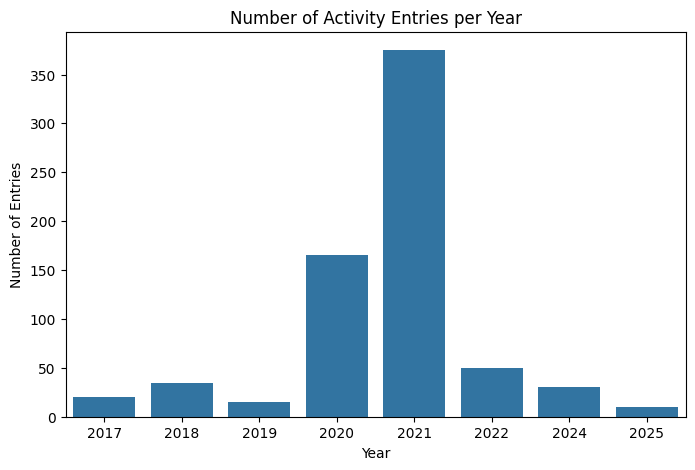

In [13]:
# extract year from the Date column
new_fitness["Year"] = new_fitness["Date"].dt.year

# count entries per year
year_counts = new_fitness["Year"].value_counts().sort_index()

# plotting and formatting the visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title("Number of Activity Entries per Year")
plt.xlabel("Year")
plt.ylabel("Number of Entries")
plt.show()

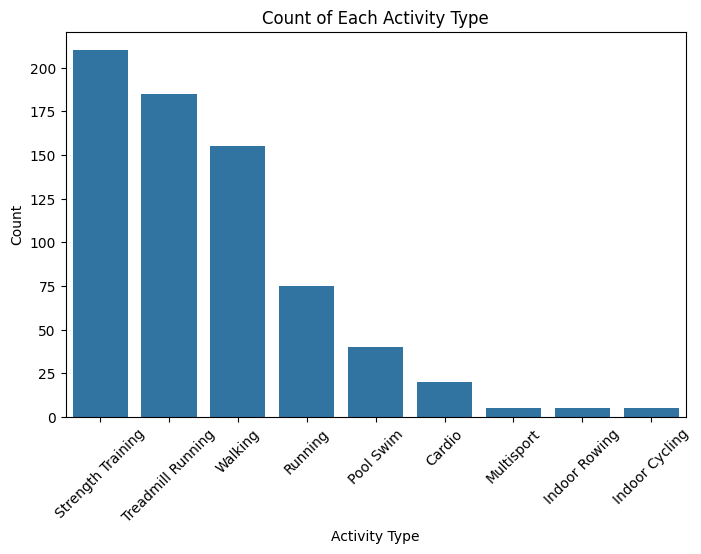

In [15]:
# count the number of entries per activity type
activity_cnt = new_fitness["Activity Type"].value_counts()

# create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=activity_cnt.index, y=activity_cnt.values)

# customize the plot
plt.title("Count of Each Activity Type")
plt.xlabel("Activity Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

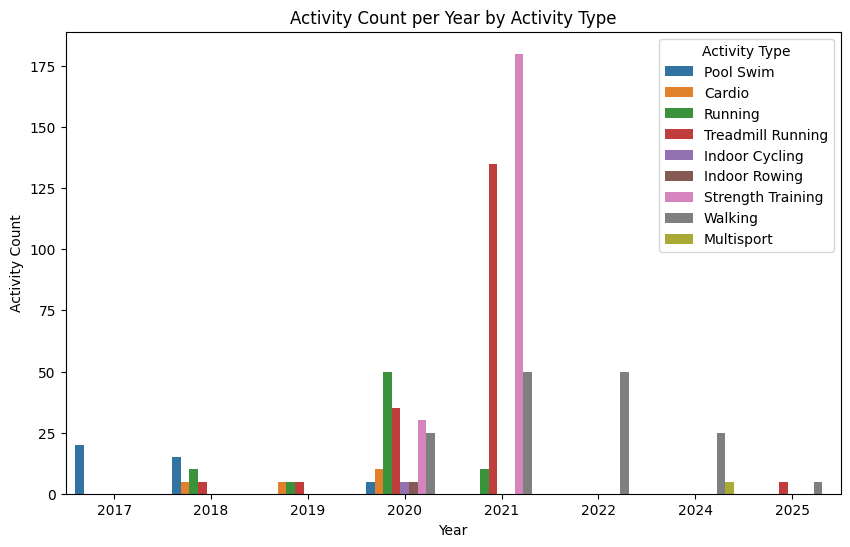

In [18]:
# group by Year and Activity Type, and count the number of records
activity_year_counts = new_fitness.groupby(["Year", "Activity Type"]).size().reset_index(name="Count")

# plot the grouped activity counts
plt.figure(figsize=(10, 6))
sns.barplot(data=activity_year_counts, x="Year", y="Count", hue="Activity Type")

# add titles and labels
plt.title("Activity Count per Year by Activity Type")
plt.xlabel("Year")
plt.ylabel("Activity Count")
plt.legend(title="Activity Type")
plt.show()

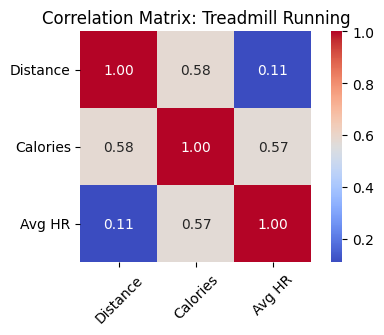

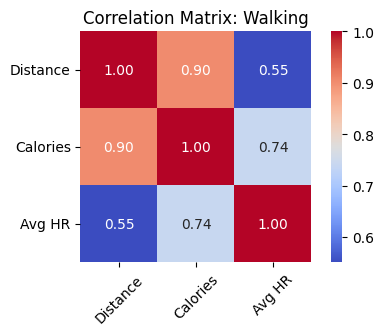

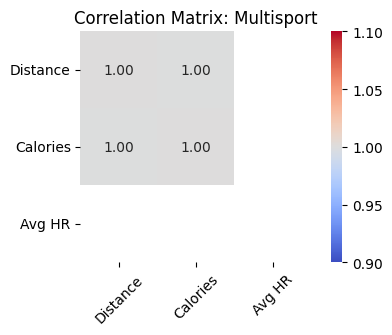

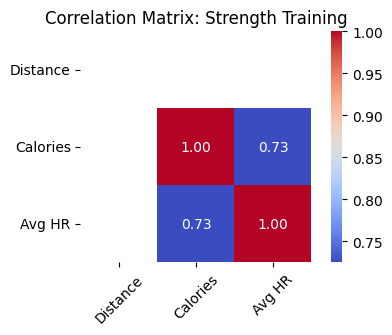

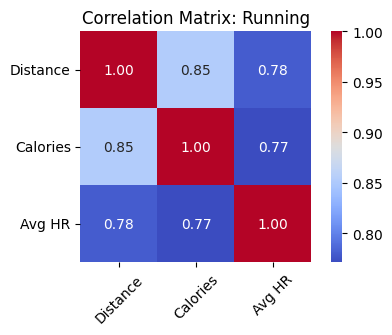

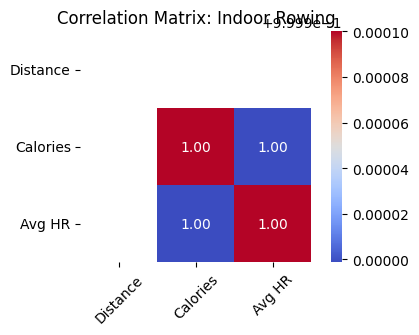

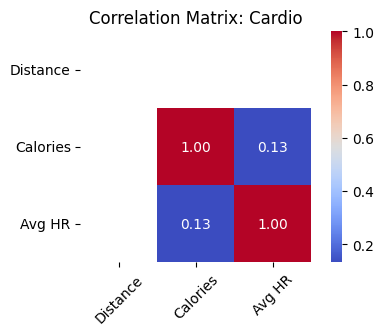

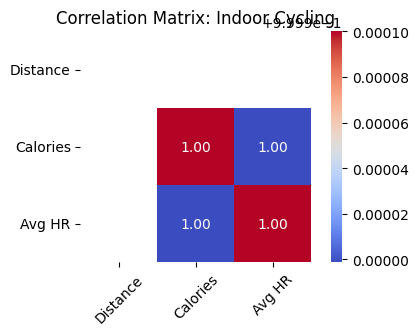

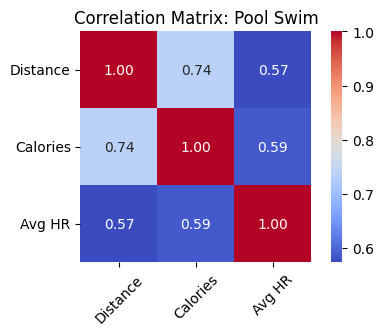

In [20]:
# list of columns to exclude
exclude_columns = ["Time (seconds)", "Calories per km"]

# loop through each unique Activity Type
activity_types = new_fitness["Activity Type"].dropna().unique()

for activity in activity_types:
    # filter the dataset by activity type
    subset = new_fitness[new_fitness["Activity Type"] == activity]
    
    # select numeric columns and drop excluded ones
    fit_num = subset.select_dtypes(include=["int64", "float64"]).drop(columns=exclude_columns, errors='ignore')

    # skip if there's not enough numeric data
    if fit_num.shape[1] < 2:
        print(f"Skipping '{activity}' — not enough numeric columns after filtering.")
        continue

    # compute correlation matrix
    correlation_matrix = fit_num.corr()

    # plot the heatmap
    plt.figure(figsize=(5, 3))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)

    # add titles and formatting
    plt.title(f"Correlation Matrix: {activity}")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()


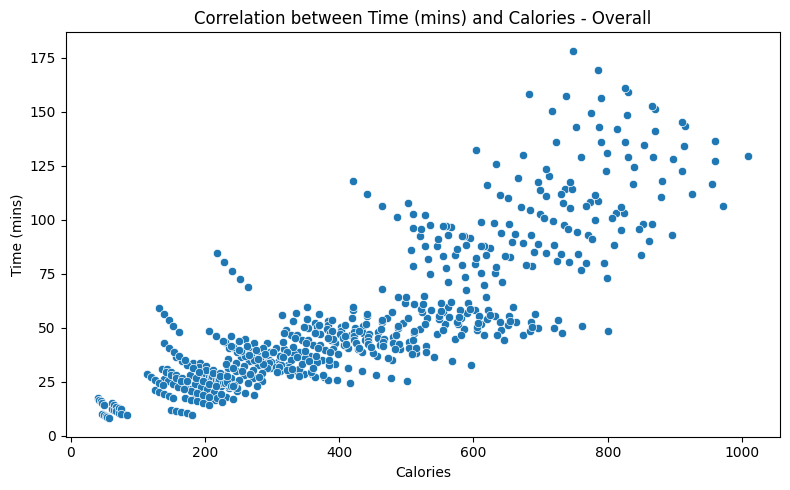

In [25]:
# convert seconds to minutes and store in a new column
new_fitness["Time (minutes)"] = new_fitness["Time (seconds)"] / 60

# ensure both columns are numeric and drop rows with missing values
fit_corr = new_fitness[["Time (minutes)", "Calories"]].dropna()

# create the scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=fit_corr, x="Calories", y="Time (minutes)")

# add title and labels
plt.title("Correlation between Time (mins) and Calories - Overall")
plt.xlabel("Calories")
plt.ylabel("Time (mins)")
plt.tight_layout()

# Show the plot
plt.show()

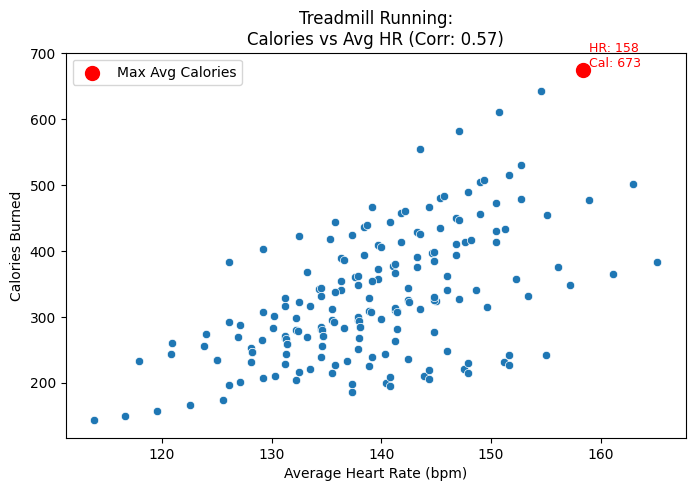

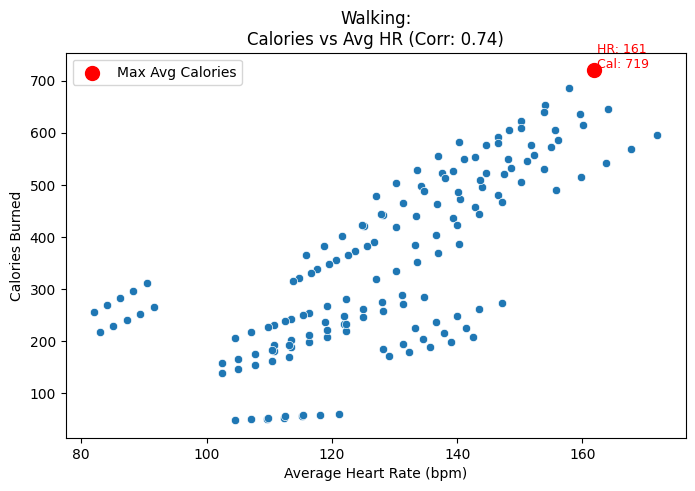

Skipping 'Multisport' due to insufficient data.


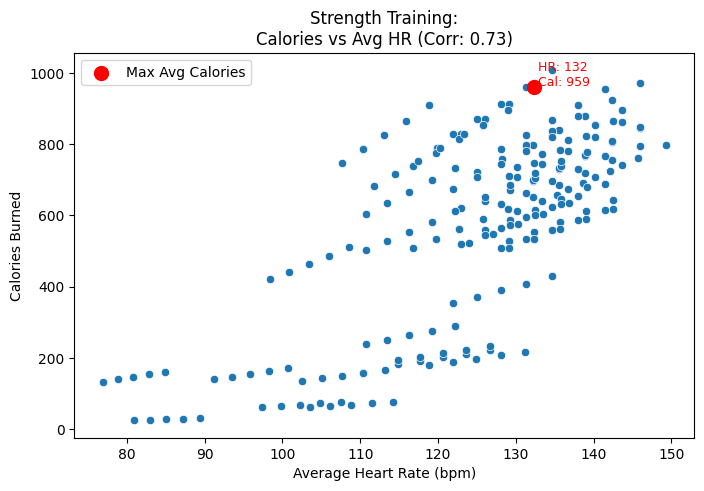

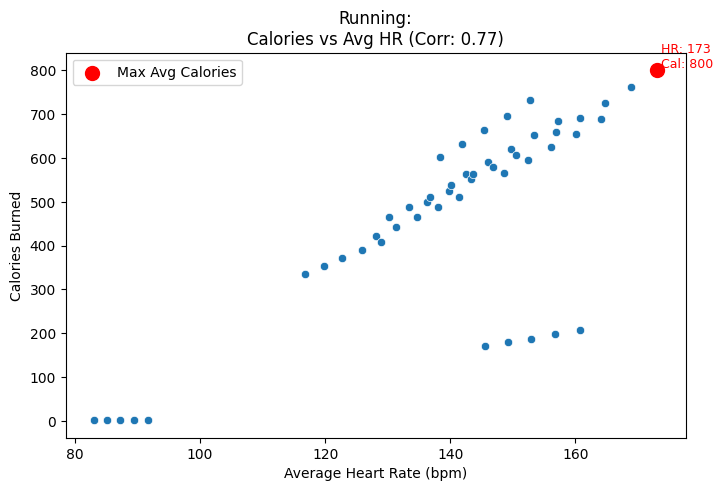

Skipping 'Indoor Rowing' due to insufficient data.


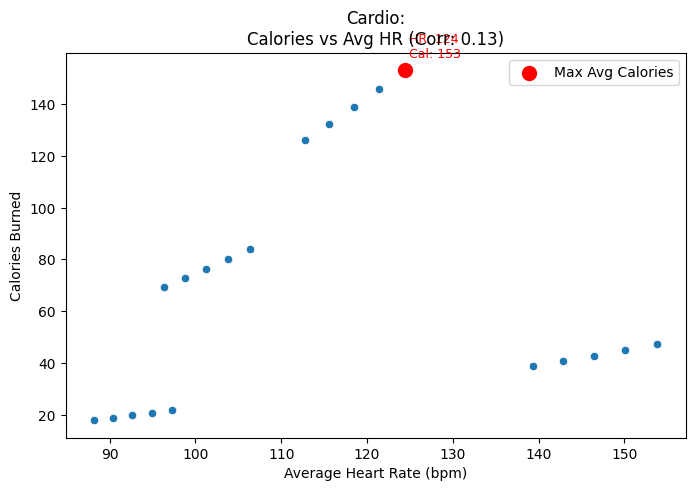

Skipping 'Indoor Cycling' due to insufficient data.


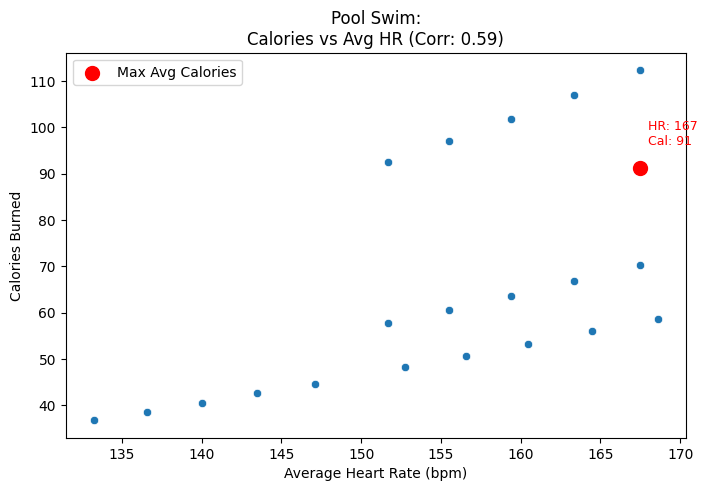

In [26]:
# get unique activity types
activity_types = new_fitness["Activity Type"].dropna().unique()

# loop through each activity type
for activity in activity_types:
    # filter data for the activity
    activity_df = new_fitness[
        (new_fitness["Activity Type"] == activity) & 
        new_fitness["Avg HR"].notna() & 
        new_fitness["Calories"].notna()
    ][["Avg HR", "Calories"]].copy()

    # skip if there's not enough data
    if len(activity_df) < 6:
        print(f"Skipping '{activity}' due to insufficient data.")
        continue

    # group by Avg HR and compute average calories
    avg_calories_by_hr = activity_df.groupby("Avg HR")["Calories"].mean().reset_index()

    # find the HR with highest avg calories burned
    max_cal_row = avg_calories_by_hr.loc[avg_calories_by_hr["Calories"].idxmax()]

    # plot the graph
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=activity_df, x="Avg HR", y="Calories")
    plt.scatter(max_cal_row["Avg HR"], max_cal_row["Calories"],
                color='red', s=100, label="Max Avg Calories")

    # add annotation
    plt.text(max_cal_row["Avg HR"] + 0.5, max_cal_row["Calories"] + 5,
             f'HR: {int(max_cal_row["Avg HR"])}\nCal: {int(max_cal_row["Calories"])}',
             fontsize=9, color='red')

    # add correlation coefficient
    corr = activity_df["Avg HR"].corr(activity_df["Calories"])
    plt.title(f"{activity}:\nCalories vs Avg HR (Corr: {corr:.2f})")
    plt.xlabel("Average Heart Rate (bpm)")
    plt.ylabel("Calories Burned")
    plt.legend()
    plt.show()

In [28]:
# drop rows with missing or zero Distance or Calories
efficiency = new_fitness[(new_fitness["Distance"].notna()) & (new_fitness["Calories"].notna()) & (new_fitness["Distance"] > 0)].copy()

# create new column: calories per km
efficiency["Calories per km"] = efficiency["Calories"] / efficiency["Distance"]

# identify top 5 most calorie-efficient runs
efficient_runs = efficiency[["Date", "Activity Type", "Calories", "Distance", "Calories per km"]] \
    .sort_values("Calories per km", ascending=False) \
    .head(5)

# display result
print("Treadmill running burns the most calories per unit distance, which is 536 calories per km.") 
efficient_runs.head(5)


Treadmill running burns the most calories per unit distance, which is 536 calories per km.


,Date,Activity Type,Calories,Distance,Calories per km
661,2020-12-05 19:14:00,Treadmill Running,280.781944,0.523275,536.585366
381,2020-12-05 19:14:00,Treadmill Running,254.677500,0.474626,536.585366
241,2020-12-05 19:14:00,Treadmill Running,242.550000,0.452025,536.585366
101,2020-12-05 19:14:00,Treadmill Running,231.000000,0.430500,536.585366
521,2020-12-05 19:14:00,Treadmill Running,267.411375,0.498358,536.585366
